In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [5]:
torch.linspace(0, 9, steps = 20)

tensor([0.0000, 0.4737, 0.9474, 1.4211, 1.8947, 2.3684, 2.8421, 3.3158, 3.7895,
        4.2632, 4.7368, 5.2105, 5.6842, 6.1579, 6.6316, 7.1053, 7.5789, 8.0526,
        8.5263, 9.0000])

In [6]:
#n = 50304 # vocab size
n = 32000 # vocab size
logit_stds = torch.linspace(0, 9, steps = 20)
entropies = []

for logit_std in logit_stds:
    logits = torch.randn(1024, n) * logit_std # (num_tokens, vocab_size)
    log_probs = torch.log_softmax(logits, dim = -1)
    entropy = -(log_probs.exp() * log_probs).sum(dim = -1).mean()
    entropies.append(entropy.item())

Text(0, 0.5, 'Entropy, $S(\\beta^*)$')

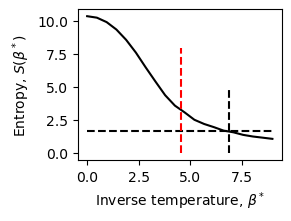

In [7]:
plt.figure(figsize=(2.8,2.1), constrained_layout=True)
plt.plot(logit_stds.numpy(), entropies, 'k-')
plt.plot([0,9], [1.69,1.69], 'k--')
plt.plot([6.8684,6.8684], [0,5], 'k--')
plt.plot([np.sqrt(2*np.log(n)),np.sqrt(2*np.log(n))], [0,8], 'r--')
plt.xlabel(r'Inverse temperature, $\beta^*$') 
plt.ylabel(r'Entropy, $S(\beta^*)$')
#plt.savefig('../figures/hightemp.pdf')

In [8]:
(logit_stds[-6] + logit_stds[-5])/2

tensor(6.8684)

In [9]:
np.sqrt(2*np.log(n))

4.554885548898428